 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
csv_path = Path("../Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_returns = pd.read_csv(csv_path, index_col = "Date") 
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
whale_returns = whale_returns.dropna()

In [6]:
# Drop nulls
whale_returns.index = pd.to_datetime(whale_returns.index, format = '%Y/%m/%d')
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
csv_path = Path("../Resources/algo_returns.csv")
algo_returns = pd.read_csv(csv_path, index_col = "Date")
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [10]:
algo_returns.index = pd.to_datetime(algo_returns.index, format = '%Y/%m/%d')
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
csv_path = Path("../Resources/sp_tsx_history.csv")
sp_tsx = pd.read_csv(csv_path, index_col = "Date")
sp_tsx.head()

,Close
Date,
1-Oct-2012,"$12,370.19"
2-Oct-2012,"$12,391.23"
3-Oct-2012,"$12,359.47"
4-Oct-2012,"$12,447.68"
5-Oct-2012,"$12,418.99"


In [12]:
# Check Data Types
sp_tsx.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types

# Convert the 'Date' column to datetime format
sp_tsx.index = pd.to_datetime(sp_tsx.index, format = '%d-%b-%Y')

# Remove the dollar sign and commas from the 'Close' column values          
sp_tsx['Close'] = sp_tsx['Close'].str.replace('[^\d.]', '', regex=True).astype(float)
            
sp_tsx.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [14]:
# Drop nulls
sp_tsx.isnull().sum()
sp_tsx.dropna(inplace=True)
sp_tsx.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [15]:
# Calculate Daily Returns

# Calculate daily returns for the S&P TSX 60 closing prices
sp_tsx_daily_returns = sp_tsx['Close'].pct_change()

# Replace the 'Close' column with the daily returns
sp_tsx['Close'] = sp_tsx_daily_returns

# Drop the first row since it will have a NaN value after calculating daily returns
sp_tsx.dropna(inplace=True)

sp_tsx.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx.rename(columns={'Close': 'S&P_TSX'}, inplace=True)
sp_tsx.head()

,S&P_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
# Convert the 'Date' columns in all three dataframes to datetime64[ns] type
combined_returns = pd.concat([whale_returns, algo_returns, sp_tsx], axis = "columns", join = "inner")
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

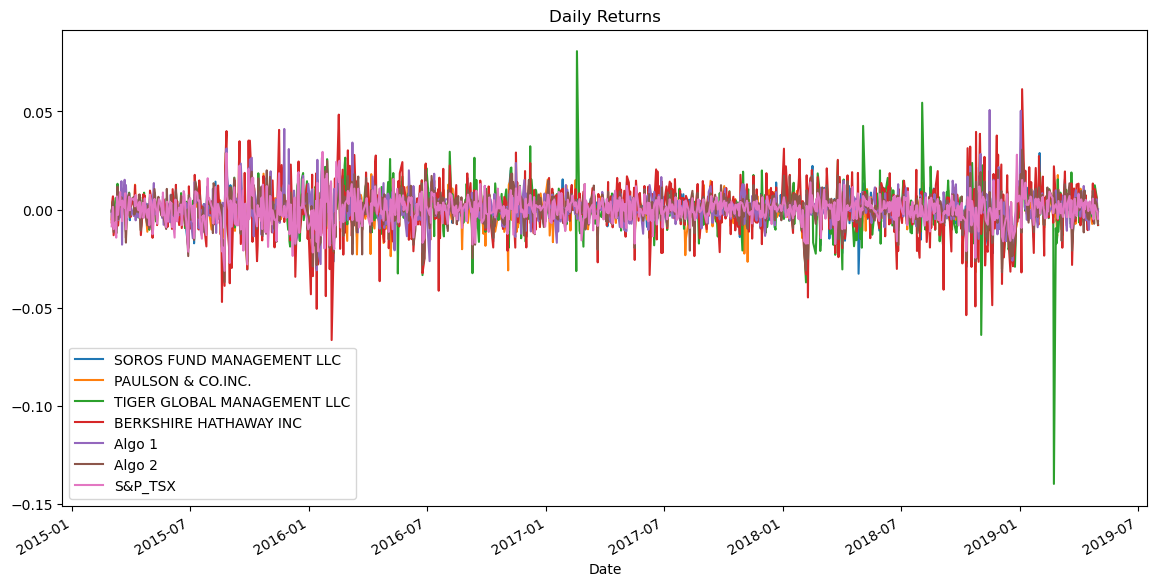

In [18]:
# Plot daily returns of all portfolios

# Plot daily returns of all portfolios
combined_returns_plot = combined_returns.plot(figsize=(14,7), title='Daily Returns')

combined_returns_plot

#### Calculate and Plot cumulative returns.

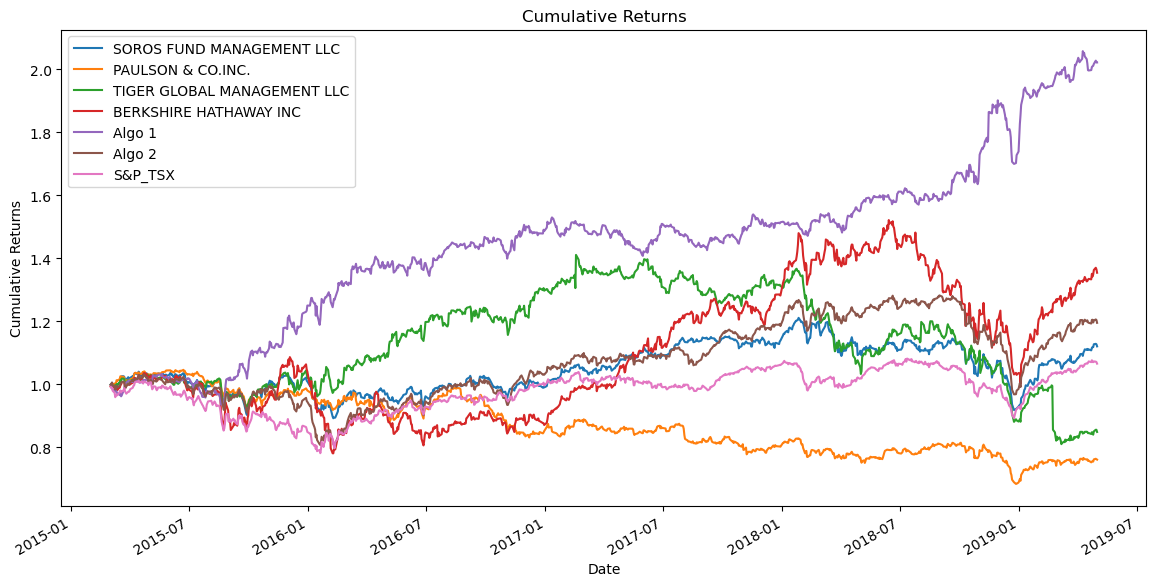

In [47]:
# Calculate cumulative returns of all portfolios
combined_cumulative_df = (1 + combined_returns).cumprod()
# Plot cumulative returns
combined_cumulative_df.plot(figsize=(14,7), title='Cumulative Returns')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.show()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


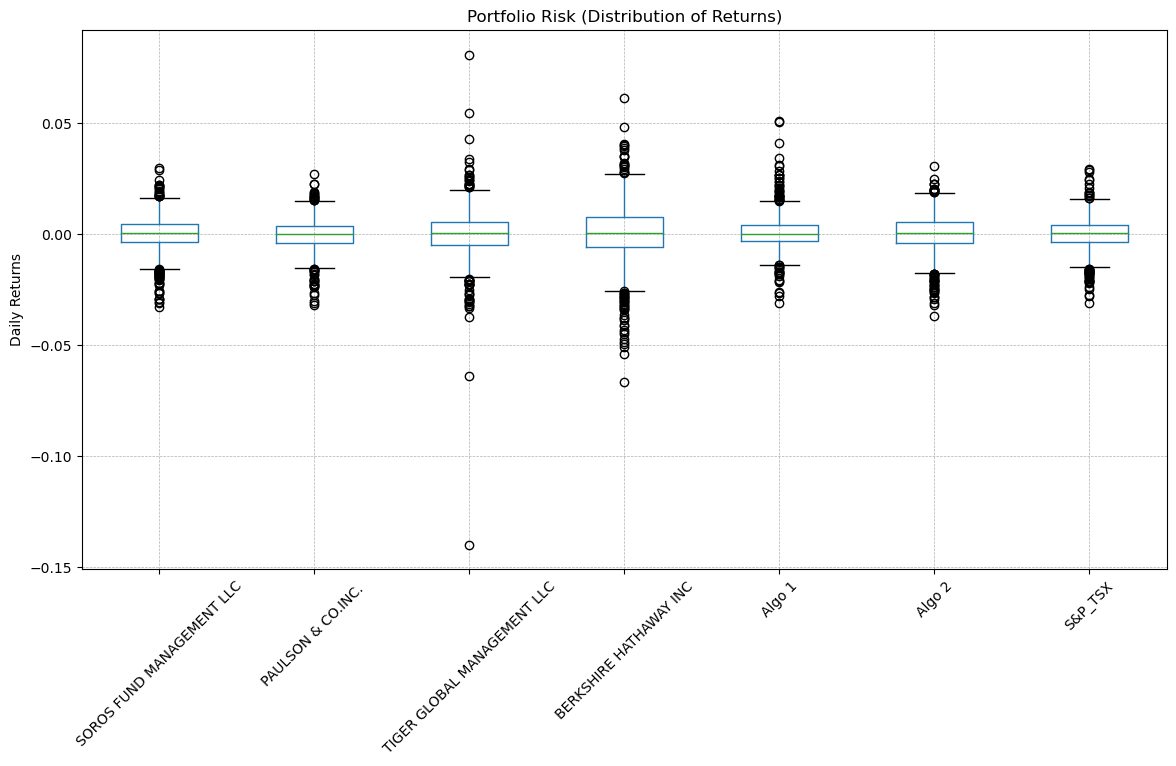

In [20]:
# Box plot to visually show risk
combined_returns.boxplot(figsize=(14,7))
plt.title('Portfolio Risk (Distribution of Returns)')
plt.ylabel('Daily Returns')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P_TSX                        0.007034
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [22]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = combined_returns['S&P_TSX'].std()
print(sp_tsx_std)

# Determine which portfolios are riskier than the S&P TSX 60
riskier_portfolios = daily_std[daily_std > sp_tsx_std]
riskier_portfolios.index

0.007034167748577725


Index(['SOROS FUND MANAGEMENT LLC', 'TIGER GLOBAL MANAGEMENT LLC',
       'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2'],
      dtype='object')

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': '21-Day Rolling Standard Deviation'}, xlabel='Date'>

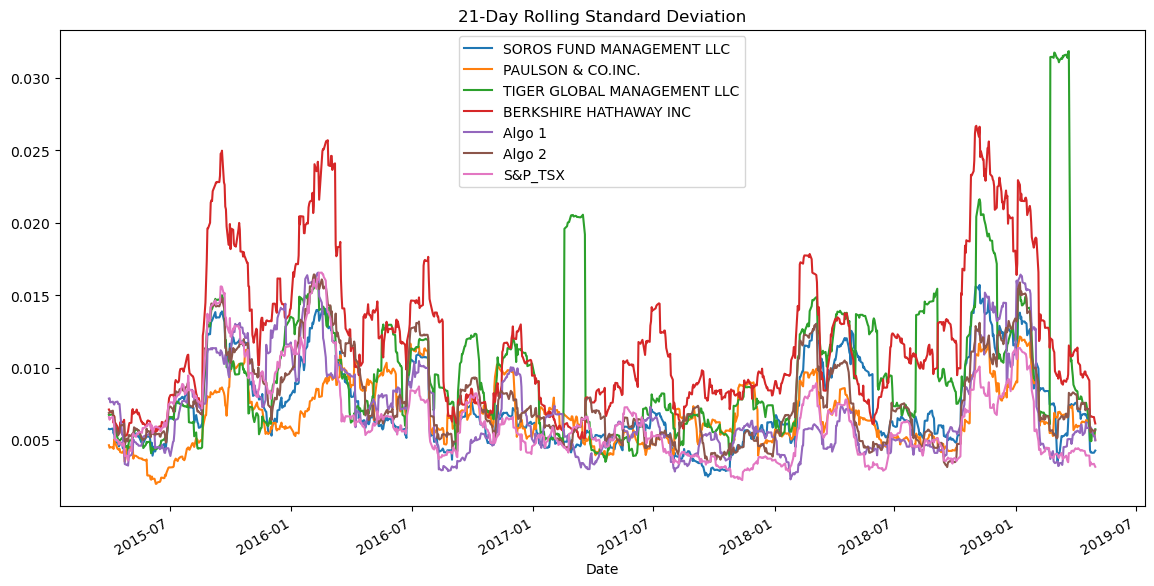

In [48]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_21.plot(figsize=(14,7), title='21-Day Rolling Standard Deviation')

### Calculate and plot the correlation

<Axes: >

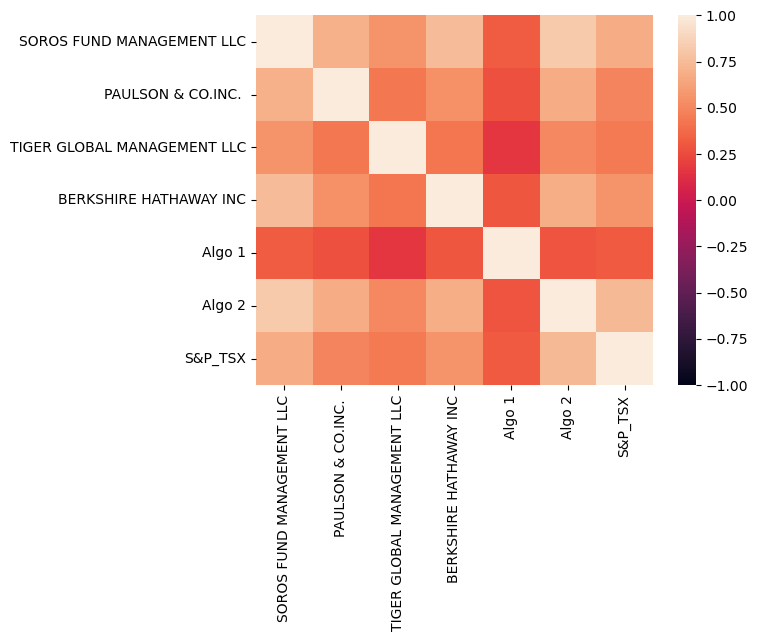

In [25]:
# Calculate the correlation
correlation_matrix = combined_returns.corr()
correlation_matrix
# Display de correlation matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000011
2019-04-26    0.000010
2019-04-29    0.000010
2019-04-30    0.000009
2019-05-01    0.000011
Length: 1029, dtype: float64
Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000011
2019-04-26    0.000011
2019-04-29    0.000011
2019-04-30    0.000010
2019-05-01    0.000010
Name: S&P_TSX, Length: 1029, dtype: float64
Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.932640
2019-04-26    0.945220
2019-04-29    0.877395
2019-04-30    0.902627
2019-05-01    1.119309
Length: 1029, dtype: float64


<Axes: title={'center': 'TIGER GLOBAL MANAGEMENT LLC.Beta'}, xlabel='Date'>

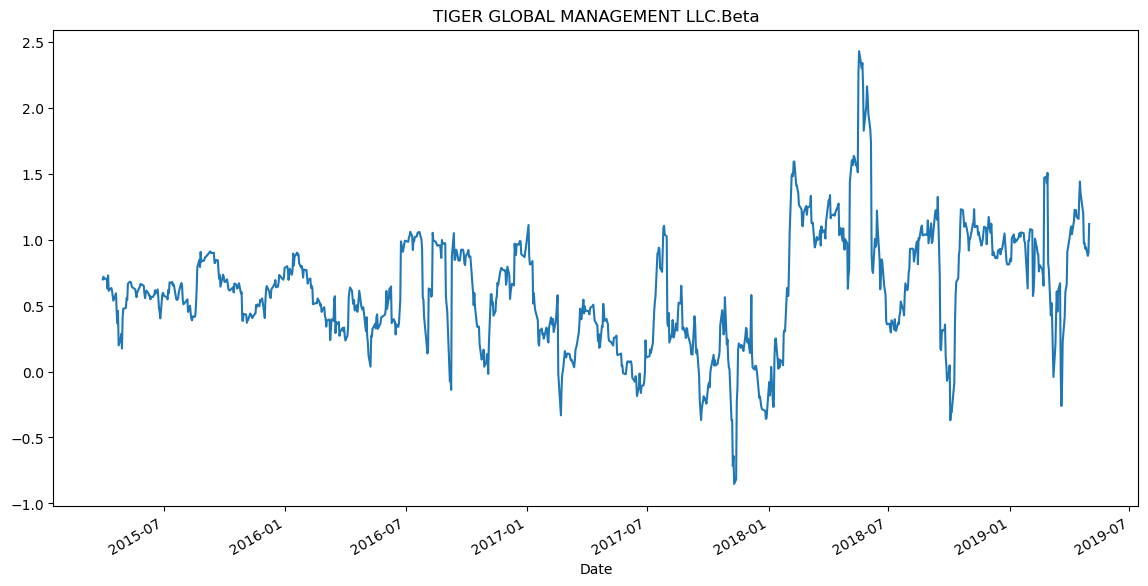

In [49]:
# Calculate covariance of a single portfolio
tiger_covariance = combined_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).cov(combined_returns['S&P_TSX'])
print(tiger_covariance)
# Calculate variance of S&P TSX
sp_df_variance = combined_returns['S&P_TSX'].rolling(window=21).var()
print(sp_df_variance)
# Computing beta
tiger_beta = tiger_covariance / sp_df_variance
print(tiger_beta)
# Plot beta trend
tiger_beta.plot(figsize=(14,7), title='TIGER GLOBAL MANAGEMENT LLC.Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'Exponentially Weighted Beta Trend for TIGER GLOBAL MANAGEMENT LLC'}, xlabel='Date'>

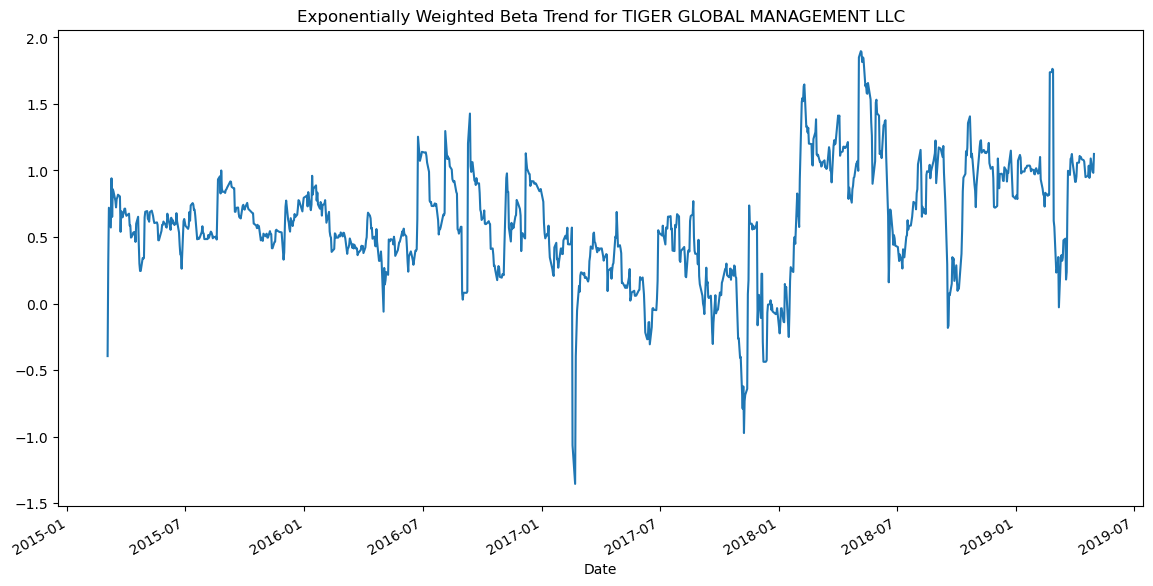

In [27]:
# Use `ewm` to calculate the rolling window

# Calculate exponentially weighted covariance of 'TIGER GLOBAL MANAGEMENT LLC' with S&P TSX 60
ewm_covariance = combined_returns['TIGER GLOBAL MANAGEMENT LLC'].ewm(span=21).cov(combined_returns['S&P_TSX'])

# Calculate exponentially weighted variance of S&P TSX 60
ewm_variance = combined_returns['S&P_TSX'].ewm(span=21).var()

# Compute exponentially weighted beta for 'TIGER GLOBAL MANAGEMENT LLC'
ewm_beta = ewm_covariance / ewm_variance

# Plot the exponentially weighted beta trend
ewm_beta.plot(figsize=(14,7), title='Exponentially Weighted Beta Trend for TIGER GLOBAL MANAGEMENT LLC')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios

# Assuming a daily risk-free rate of 0 for simplicity
daily_risk_free_rate = 0.0

# Calculate the average daily return for each portfolio
avg_daily_return = combined_returns.mean()

# Calculate the daily standard deviation for each portfolio
daily_std = combined_returns.std()

# Calculate the daily Sharpe Ratios
daily_sharpe_ratios = (avg_daily_return - daily_risk_free_rate) / daily_std

# Annualize the Sharpe Ratios
annualized_sharpe_ratios = daily_sharpe_ratios * (252 ** 0.5)

# Display the annualized Sharpe Ratios
print(annualized_sharpe_ratios)

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P_TSX                        0.195550
dtype: float64


<Axes: title={'center': 'Sharpe Ratios'}>

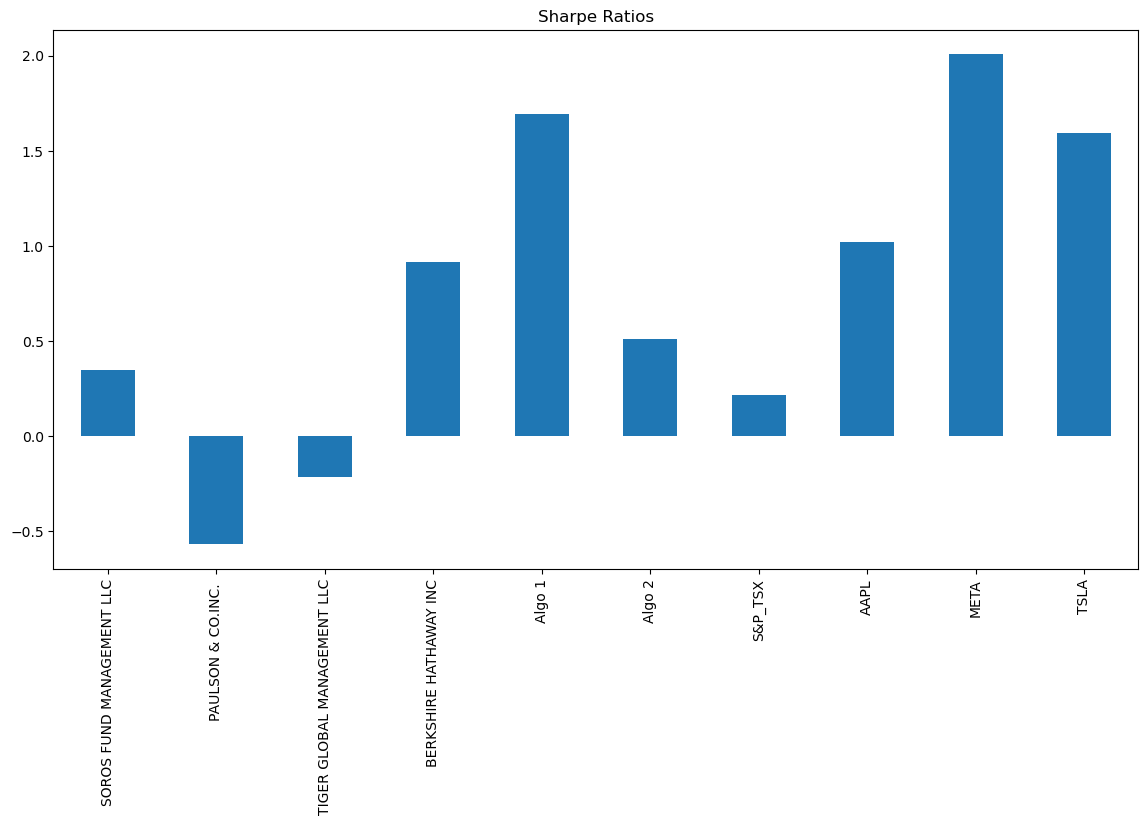

In [50]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind='bar', figsize=(14,7), title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

## Analysis:

### Algorithmic Strategies vs. Market (S&P TSX 60):

* Algo 1 has the highest Sharpe Ratio of 1.491514, indicating it has the best risk-adjusted return among all portfolios.

* Algo 2 also outperforms the market (S&P TSX 60) with a Sharpe Ratio of 0.396817 compared to the market's 0.195550.

### Algorithmic Strategies vs. Whales Portfolios:

* Among the whales portfolios, only BERKSHIRE HATHAWAY INC has a Sharpe Ratio (0.467045) that's higher than Algo 2 but still lower than Algo 1.

### Algo 1 has the highest Sharpe Ratio of 1.491514, indicating it has the best risk-adjusted return among all portfolios.Conclusion:

* Both algorithmic strategies, especially Algo 1, outperform the market (S&P TSX 60). Additionally, Algo 1 outperforms all the whales portfolios, while Algo 2 outperforms most of the whales portfolios except for BERKSHIRE HATHAWAY INC.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
csv_path = Path("../Resources/aapl.csv")
aapl_df = pd.read_csv(csv_path, index_col = "Date")

aapl_df.head()

,Close
Date,
05/09/2014 16:00:00,24.74
08/09/2014 16:00:00,24.59
09/09/2014 16:00:00,24.50
10/09/2014 16:00:00,25.25
11/09/2014 16:00:00,25.36


In [31]:
# Reading data from 2nd stock
csv_path = Path("../Resources/meta.csv")
meta_df = pd.read_csv(csv_path, index_col = "Date")
meta_df.head()

,Close
Date,
05/09/2014 16:00:00,77.26
08/09/2014 16:00:00,77.89
09/09/2014 16:00:00,76.67
10/09/2014 16:00:00,77.43
11/09/2014 16:00:00,77.92


In [32]:
# Reading data from 3rd stock
csv_path = Path("../Resources/tsla.csv")
tsla_df = pd.read_csv(csv_path, index_col = "Date")
tsla_df.head()

,Close
Date,
28/05/2014 16:00:00,14.02
29/05/2014 16:00:00,14.02
30/05/2014 16:00:00,13.85
02/06/2014 16:00:00,13.65
03/06/2014 16:00:00,13.66


In [33]:
# Check for null values and data types for each DataFrame
aapl_nulls = aapl_df.isnull().sum()
meta_nulls = meta_df.isnull().sum()
tsla_nulls = tsla_df.isnull().sum()

aapl_data_types = aapl_df.dtypes
meta_data_types = meta_df.dtypes
tsla_data_types = tsla_df.dtypes
aapl_nulls, meta_nulls, tsla_nulls, aapl_data_types, meta_data_types, tsla_data_types

(Close    0
 dtype: int64,
 Close    0
 dtype: int64,
 Close    0
 dtype: int64,
 Close    float64
 dtype: object,
 Close    float64
 dtype: object,
 Close    float64
 dtype: object)

In [34]:
# Combine the DataFrames using concat
combined_df = pd.concat([aapl_df['Close'], meta_df['Close'], tsla_df['Close']], axis=1)

# Rename columns for clarity
combined_df.columns = ['AAPL', 'META', 'TSLA']

# Converting the index to datetime format
combined_df.index = pd.to_datetime(combined_df.index, format = "%d/%m/%Y %H:%M:%S")
combined_df.index = combined_df.index.strftime('%Y-%m-%d')
combined_df.index = pd.to_datetime(combined_df.index, format = "%Y-%m-%d")

# Display the combined DataFrame
combined_df.head()

,AAPL,META,TSLA
Date,,,
2014-09-05,24.74,77.26,18.49
2014-09-08,24.59,77.89,18.81
2014-09-09,24.50,76.67,18.57
2014-09-10,25.25,77.43,18.74
2014-09-11,25.36,77.92,18.69


In [35]:
# Reset Date index
combined_df = combined_df.sort_index()

# Display the updated DataFrame
combined_df.head()

,AAPL,META,TSLA
Date,,,
2014-05-28,NaN,NaN,14.02
2014-05-29,NaN,NaN,14.02
2014-05-30,NaN,NaN,13.85
2014-06-02,NaN,NaN,13.65
2014-06-03,NaN,NaN,13.66


In [36]:
# Reorganize portfolio data by having a column per symbol

# Ensure the DataFrame contains only the expected columns
# combined_df.columns = [['AAPL', 'META', 'TSLA']]

# Display the reorganized DataFrame
# combined_df.head()

In [37]:
# Calculate daily returns
my_returns = combined_df.pct_change()

# Drop NAs
my_returns = my_returns.dropna()

# Display sample data
my_returns.head()

,AAPL,META,TSLA
Date,,,
2014-09-08,-0.006063,0.008154,0.017307
2014-09-09,-0.003660,-0.015663,-0.012759
2014-09-10,0.030612,0.009913,0.009155
2014-09-11,0.004356,0.006328,-0.002668
2014-09-12,0.002366,-0.005647,-0.004280


# Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_returns1 = my_returns.dot(weights)

# Create a dataframe
my_returns_df = pd.DataFrame({'Stock' : my_returns1})

# Display sample data
my_returns_df.head()

,Stock
Date,
2014-09-08,0.006466
2014-09-09,-0.010694
2014-09-10,0.016560
2014-09-11,0.002672
2014-09-12,-0.002520


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([combined_returns, my_returns], axis="columns", join="inner")

# Display the updated DataFrame with the portfolio returns
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX,AAPL,META,TSLA
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.002169,-0.001881,0.010638
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.006184,0.016332,0.015038
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.016801,0.003832,-0.008889
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,0.001582,-0.014777,-0.033632
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.004423,-0.007124,-0.015468


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# Drop rows with NaN values from the daily_returns DataFrame
all_returns.dropna(inplace=True)

# Display the updated DataFrame
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX,AAPL,META,TSLA
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.002169,-0.001881,0.010638
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.006184,0.016332,0.015038
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.016801,0.003832,-0.008889
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,0.001582,-0.014777,-0.033632
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.004423,-0.007124,-0.015468


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`
daily_std = all_returns.std()

annualized_std = daily_std * np.sqrt(252)

annualized_std

SOROS FUND MANAGEMENT LLC      0.124284
PAULSON & CO.INC.              0.110894
TIGER GLOBAL MANAGEMENT LLC    0.172799
BERKSHIRE HATHAWAY INC         0.203657
Algo 1                         0.120528
Algo 2                         0.132188
S&P_TSX                        0.111693
AAPL                           0.245123
META                           0.287431
TSLA                           0.443300
dtype: float64

### Calculate and plot rolling `std` with 21-day window

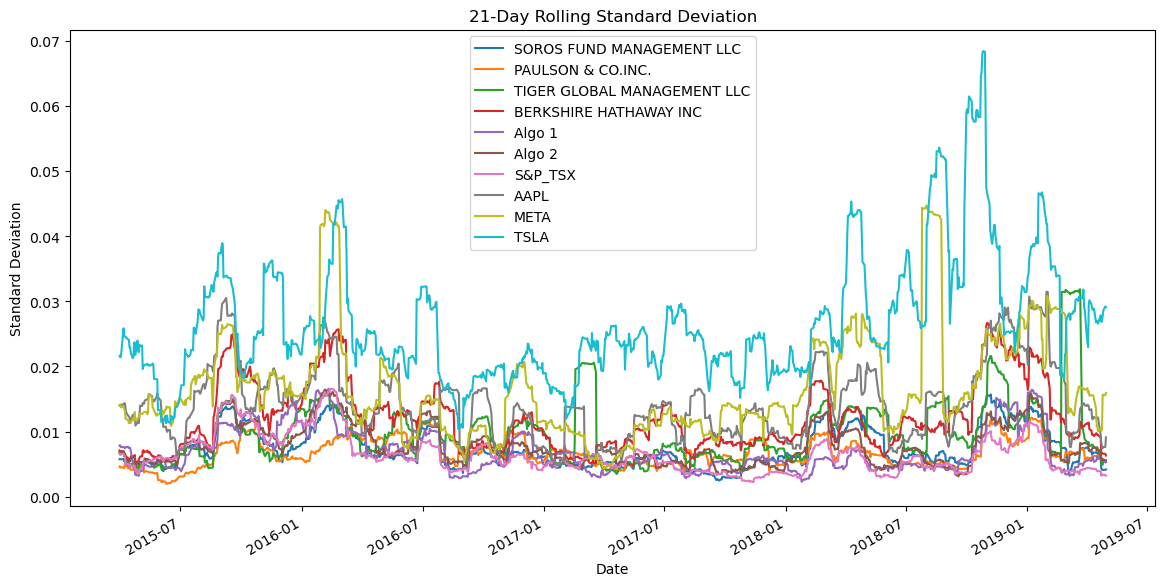

In [42]:
# Calculate rolling standard deviation
rolling_std_21 = all_returns.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std_21.plot(figsize=(14,7), title="21-Day Rolling Standard Deviation")
plt.ylabel("Standard Deviation")
plt.xlabel("Date")
plt.show()

### Calculate and plot the correlation

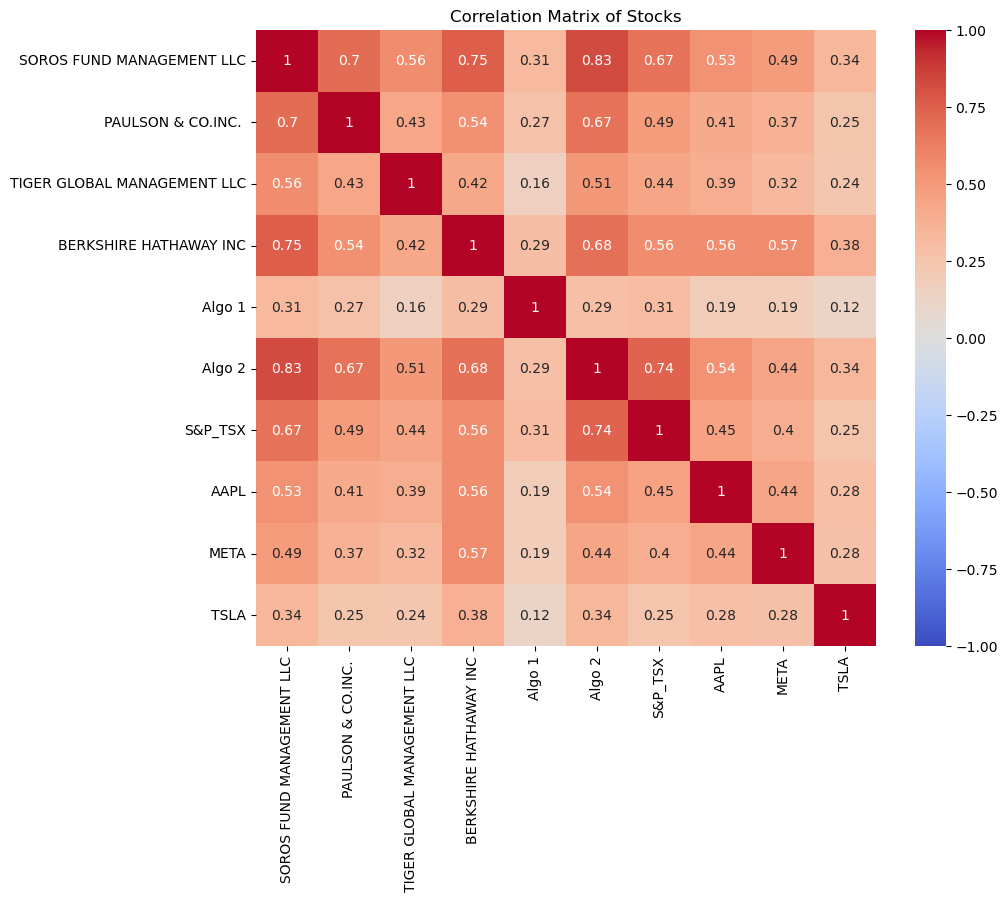

In [43]:
# Calculate and plot the correlation

# Calculate the correlation matrix
correlation_matrix = all_returns.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Stocks")
plt.show()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: title={'center': 'AAPL.Beta'}, xlabel='Date'>

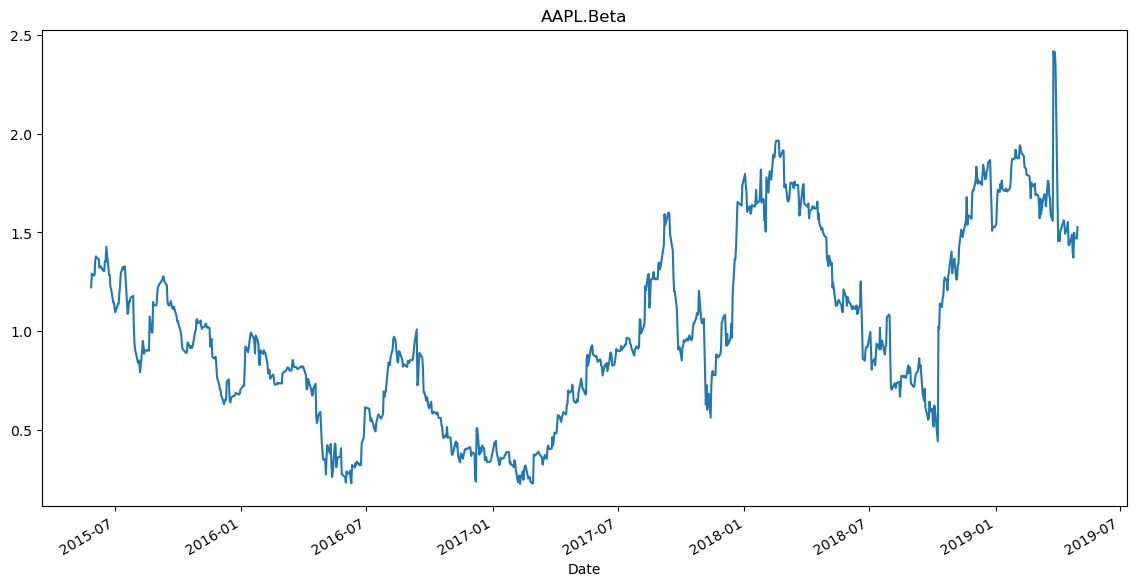

In [54]:
# Calculate and plot Beta
# Calculate 60-day rolling covariance between your portfolio and the S&P 60 TSX
rolling_covariance = all_returns['AAPL'].rolling(window=60).cov(combined_returns['S&P_TSX'])

# Calculate 60-day rolling variance of the S&P 60 TSX
rolling_variance = combined_returns['S&P_TSX'].rolling(window=60).var()

# Calculate the rolling beta
rolling_beta = rolling_covariance / rolling_variance

# Plot the rolling beta
rolling_beta.plot(figsize=(14, 7), title='AAPL.Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualized Sharpe Ratios
all_portfolio_std = all_returns.std()
all_portfolio_std.head()
annualized_sharpe_ratios = (all_returns.mean() * 252) / (all_portfolio_std.std() * np.sqrt(252))

annualized_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.348811
PAULSON & CO.INC.             -0.568212
TIGER GLOBAL MANAGEMENT LLC   -0.216605
BERKSHIRE HATHAWAY INC         0.913095
Algo 1                         1.691056
Algo 2                         0.510651
S&P_TSX                        0.216373
AAPL                           1.021055
META                           2.006128
TSLA                           1.595565
dtype: float64

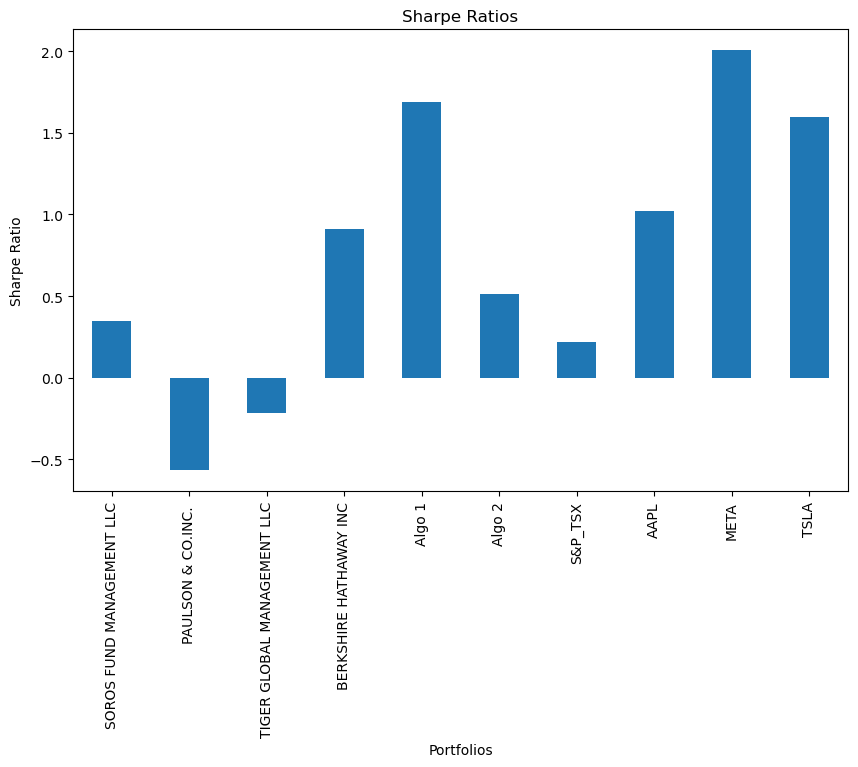

In [51]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind='bar', figsize=(10,6), title="Sharpe Ratios")
plt.ylabel("Sharpe Ratio")
plt.xlabel("Portfolios")
plt.show()

### How does your portfolio do?

* AAPL: 1.021055 AAPL has a Sharpe Ratio slightly above 1.0, indicating that it has provided a return that is good relative to its risk.

* META: 2.006128 META has a Sharpe Ratio of over 2.0, which is excellent. This suggests that META has provided a very good return for the level of risk it has taken on.

* TSLA: 1.595565 TSLA also has a strong Sharpe Ratio, well above 1.0. This indicates that TSLA has provided a good return relative to its risk.

* In conclusion, my portfolios appears to be performing well in terms of risk-adjusted returns. All three stocks have Sharpe Ratios above 1.0, with META having an exceptionally high ratio. This suggests that your portfolio has been providing returns that more than justify the risks associated with these investments.